The only purpose of this notebook is to generate a submission.

In [2]:
LOCAL = True
data_fpath = '../data/raw/' if LOCAL else '/kaggle/input/protein-localization/'
data_eng_fpath = '../data/intermediate/' if LOCAL else '../input/data-engineering/'
out_fpath = '../data/intermediate/' if LOCAL else ''
selected_feats_fpath = '../data/intermediate/' if LOCAL else '../input/lightgbm-feature-selection/'

In [3]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import data_tools

In [48]:
from datetime import datetime
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SEED = 420

# Load Datasets

In [5]:
X = pd.read_pickle(f"{data_eng_fpath}X.pkl")
y = pd.read_pickle(f"{data_eng_fpath}y.pkl")
X.shape, y.shape

((862, 478), (862,))

In [34]:
df = pd.concat((X, y), axis=1)
df.columns = df.columns.astype(str)
df.shape

(862, 479)

In [6]:
X_kaggle = pd.read_pickle(f"{data_eng_fpath}X_kaggle.pkl")

# Feature Distributions
* Want to make sure these are even

In [8]:
def query_cols(df, s):
    return [c for c in X.columns if isinstance(c, str) and s in c]

In [19]:
interaction_features = query_cols(df, 'interaction')
interaction_features

['interaction_neg',
 'interaction_skew',
 'interaction_std',
 'interaction_max3',
 'interaction_max',
 'interaction_pos',
 'interaction_max2',
 'interaction_count',
 'interaction_min',
 'interaction_mean',
 'interaction_sum']

In [39]:
interaction_features = query_cols(df, 'ppi')
interaction_features

['min_corr_ppi',
 'ppi_genetic_physical_ratio',
 'ppi_physical_count',
 'ppi_dom_type',
 'ppi_genetic_count',
 'ppi_gen_phys_count',
 'max_corr_ppi']

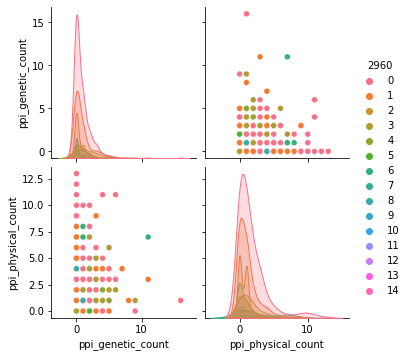

In [44]:
sns.pairplot(data=df, vars=['ppi_genetic_count', 'ppi_physical_count'], hue='2960');

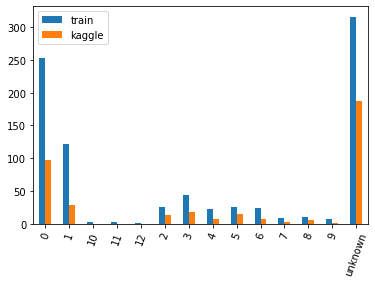

In [90]:
feat = 'mode_localization'
def plot_train_test_feats(df1, df2, feat):
    pd.DataFrame({
        'train' : df1[feat].astype(str).value_counts(),
        'kaggle' : df2[feat].astype(str).value_counts(),
    }).plot.bar(rot=70);
plot_train_test_feats(df, X_kaggle, feat)

# Protein interactions

In [ ]:
full_feat_name = data_tools.feature_name(fields, protein)
ppi_name = full_feat_name.split()[-2].upper()  # Protein name